**Q1**

MOUNTING THE DRIVE

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


importing libraries

In [2]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import sklearn

Defining Cost Functions

In [3]:
def cost_function_l2(X,y,w,lamb):

    hypothesis = np.dot(X,w.T)
    #J = (1/(2*len(y)))*np.sum((hypothesis-y)**2)
    J= (1/(2*len(y)))*np.sum((hypothesis-y)**2) + (lamb/2)*np.sum(w**2)
    return J

In [4]:
def cost_function_l1(X,y,w,lamb):
    w=w.ravel()
    hypothesis = np.dot(X,np.transpose(w))
    #J = (1/(2*len(y)))*np.sum((hypothesis-y)**2)
    J= (1/(2*len(y)))*np.sum((hypothesis-y)**2) + (lamb/2)*np.sum(abs(w))
    return J

In [5]:
def cost_function(X,y,w):

    hypothesis = np.dot(X,w.T)
    J = (1/(2*len(y)))*np.sum((hypothesis-y)**2)
#     J= (1/(2*len(y)))*np.sum((hypothesis-y)**2) + (lamb/2)*np.sum(w**2)
    return J

Defining gradient descent functions

In [6]:
def batch_gradient_descent(X,y,w,alpha,iters):
    cost_history = np.zeros(iters)
    for i in range(iters):
        hypothesis = np.dot(X,w.T)
        w = w - (alpha/len(y)) * np.dot(hypothesis - y, X)
        cost_history[i] = cost_function(X,y,w)
    return w, cost_history
    

In [7]:
def stochastic_gradient_descent_l2(X,y,w,alpha, iters,lamb):
    cost_history = np.zeros(iters)
    for i in range(iters):
        rand_index = np.random.randint(len(y)-1)
        ind_x = X[rand_index:rand_index+1]
        ind_y = y[rand_index:rand_index+1]
        w = w*(1-alpha*lamb) - alpha * (ind_x.T.dot(ind_x.dot(w) - ind_y))
        cost_history[i] = cost_function_l2(ind_x,ind_y,w,lamb)
    return w, cost_history

In [8]:
def MB_gradient_descent_l1(X,y,w,alpha, iters, batch_size,lamb):
    cost_history = np.zeros(iters)
    
    w= np.zeros(((X.shape[1]),1))

    for i in range(iters):
        
        rand_index = np.random.randint(len(y)-batch_size)
        ind_x = X[rand_index:rand_index+batch_size]
        ind_y = y[rand_index:rand_index+batch_size]
        w = w - (alpha/batch_size) * (ind_x.T.dot(ind_x.dot(w) - ind_y) - (lamb/2)*np.sign(w))
        cost_history[i] = cost_function_l1(ind_x,ind_y,w,lamb)
    return w, cost_history

Defining MSE, MAE AND CC FUNCTIONS

In [9]:
def mean_abs_error(Ypred,Yact):
    sum_error=abs(Yact - Ypred)
    ma_error=sum(sum_error)/Ypred.shape[0]
    return ma_error

In [10]:
def mean_square_error(Ypred,Yact):
  for i in range(Ypred.shape[0]):
    sum_error=(Yact - Ypred)**2
  ms_error=sum(sum_error)/Ypred.shape[0]
  return ms_error

In [11]:
def correcoff(Ypred,Yact):
    ypm=np.mean(Ypred)##mean of Ypred data
    yam=np.mean(Yact)##mean of Yactual data

    sum_numerator=((Yact - yam)*(Ypred-ypm))
    
    sum_d1=((Yact - yam)**2)
    sum_d2=((Ypred - ypm)**2)  
    sum_d1=pow(sum(sum_d1),1/2)
    sum_d2=pow(sum(sum_d2),1/2)
    th_error=sum(sum_numerator)/(sum_d1*sum_d2)
    return th_error

LOADING THE DATA

In [12]:
data_X = pd.read_excel('/content/drive/MyDrive/nnfl data/Q1_Q2/xtr.xlsx',header=None)
data_Y = pd.read_excel('/content/drive/MyDrive/nnfl data/Q1_Q2/ytr.xlsx',header=None)
data_Xte = pd.read_excel('/content/drive/MyDrive/nnfl data/Q1_Q2/xte.xlsx',header=None)
data_Yte = pd.read_excel('/content/drive/MyDrive/nnfl data/Q1_Q2/yte.xlsx',header=None)
Xte=data_Xte.values
Yte=data_Yte.values

NORMALISING THE TRAINING DATA

In [13]:
datan_x=data_X.values
X=datan_x
m=X.shape[0]
xmin=np.min(X,axis=0)
xmax=np.max(X,axis=0)
X= (X-xmin)/(xmax-xmin)

ADDING BIAS VECTOR

In [14]:
pp=np.ones([m,1])
X=np.append(pp,X,axis=1)

In [15]:
X_te = np.hstack((np.ones((Xte.shape[0],1)) , Xte))

NORMALISING THE TRAINING OUTPUT

In [16]:
datan_y=data_Y.values
y=datan_y

ymin = np.min(y, axis = 0)
ymax = np.max(y, axis = 0)
y = (y- ymin)/(ymax-ymin)
print(y.shape)

(55, 1)


INITIALISING THE WEIGHT VECTOR

In [17]:
w= np.zeros((X.shape[1]))
w1=np.zeros((X.shape[1]))###weight initialization




IMPLEMENTING BATCH GRADIENT DESCENT WITH LR

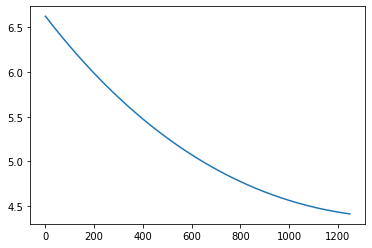

WEIGHT VECTOR [[0.18191255 0.0932603  0.10508698]]
MEAN ABSOLUTE ERROR [1.30998239]
MEAN SQUARE ERROR: [1.73572317]
CORRELATION COEFF: [-0.00825793]


In [18]:
alpha=0.00025 ##learning rate
iters=1250 ###iterations
lamb=5
batch_w,J_his = batch_gradient_descent(X,y,w,alpha,iters)

plt.plot(range(iters),J_his)
plt.show()

bgd=batch_w[-1:]
print("WEIGHT VECTOR",bgd)

y_pred_bgd=X_te.dot(bgd.T)
a=mean_abs_error(y_pred_bgd,Yte)
print("MEAN ABSOLUTE ERROR",a)

b=mean_square_error(y_pred_bgd,Yte)
print("MEAN SQUARE ERROR:",b)

c=correcoff(y_pred_bgd,Yte)
print("CORRELATION COEFF:",c)

IMPLEMENTING STOCHASTIC GRAIDENT DESCENT WITH RR[L2]

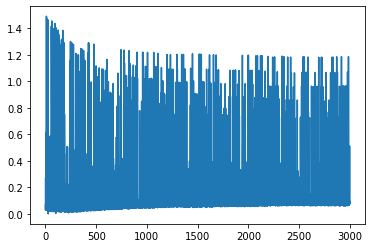

WEIGHT VECTOR: [[0.09020741 0.09020741 0.09020741]]
MEAN ABSOLUTE ERROR [1.03753298]
MEAN SQUARE ERROR: [1.09290369]
CORRELATION COEFF: [-0.00880095]


In [19]:
alpha=0.0008
iters=3000 ###iterations
lamb=1
w_n_l2,J_sgd_l2 = stochastic_gradient_descent_l2(X,y,w,alpha, iters,lamb)

plt.plot(range(iters),J_sgd_l2)
plt.show()

sgd_l2=w_n_l2[-1:]
print("WEIGHT VECTOR:",sgd_l2)

y_pred_sgd_l2=X_te.dot(sgd_l2.T)

a=mean_abs_error(y_pred_sgd_l2,Yte)
print("MEAN ABSOLUTE ERROR",a)

b=mean_square_error(y_pred_sgd_l2,Yte)
print("MEAN SQUARE ERROR:",b)

c=correcoff(y_pred_sgd_l2,Yte)
print("CORRELATION COEFF:",c)

IMPLEMENTING MINI BATCH GRADIENT DESCENT WITH LAR[L1]

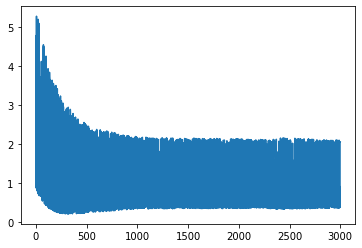

WEIGHT VECTOR: [[0.23586686]
 [0.06197959]
 [0.10418553]]
MEAN ABSOLUTE ERROR [0.8123559]
MEAN SQUARE ERROR: [0.674275]
CORRELATION COEFF: [-0.00650422]


In [20]:
alpha=0.002 
iters=3000 ###iterations
lamb=0.2
batch_size=30
mb_w_l1,J_mb_l1 = MB_gradient_descent_l1(X,y,w1,alpha, iters, batch_size,lamb)

plt.plot(range(iters),J_mb_l1)
plt.show()
print("WEIGHT VECTOR:",mb_w_l1)
y_pred_mbg_l1=X_te.dot(mb_w_l1)

a=mean_abs_error(y_pred_mbg_l1,Yte)
print("MEAN ABSOLUTE ERROR",a)

b=mean_square_error(y_pred_mbg_l1,Yte)
print("MEAN SQUARE ERROR:",b)

c=correcoff(y_pred_mbg_l1,Yte)
print("CORRELATION COEFF:",c)